In [218]:
import pandas as pd
import seaborn as sb
import numpy as np
import math as m
import statsmodels 
print('all packages installed succesfuly')

all packages installed succesfuly


In [223]:
df = pd.read_excel('/Users/axelmonod/Desktop/sx5e.xlsm')
df.head()

,Date,PX_LAST,Return,PX_VOLUME
0,2020-10-26,3121.88,0.024658,316872463.0
1,2020-10-23,3198.86,0.024658,344598401.0
2,2020-10-22,3171.41,-0.008581,346330237.0
3,2020-10-21,3180.70,0.002929,365298640.0
4,2020-10-20,3227.87,0.014830,237978921.0


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3848 entries, 0 to 3847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3848 non-null   datetime64[ns]
 1   PX_LAST    3848 non-null   float64       
 2   Return     3848 non-null   float64       
 3   PX_VOLUME  3841 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 120.4 KB


In [135]:
#How many Rows and Columns?
print('there is '+str(len(df.axes[0]))+' rows')
print('there is '+str(len(df.axes[1]))+' columns')

there is 3848 rows
there is 4 columns


In [136]:
#Calculate the volatility of the Eurostoxx index 
mean = df['Return'].mean()
print('the mean is '+str(mean))

sum = 0
for i in range(0,3848):
    sum = sum + (df.at[i,'Return'] - mean)**2
sum = sum/len(df.axes[0])
vol = m.sqrt(sum)

daily_vol = vol
weekly_vol = vol*m.sqrt(5)
monthly_vol = vol*m.sqrt(22)
annualized_vol = daily_vol*m.sqrt(252)

print('the standard deviation is '+str(m.sqrt(sum)))
print('the pandas standard deviation is '+str(df['Return'].std()))
print('------------------------------------------------------------')
print('the daily volatility is '+str(daily_vol))
print('the weekly volatility is '+str(weekly_vol))
print('the monthly volatility is '+str(monthly_vol))
print('the annualized volatility is '+str(annualized_vol))


the mean is 0.00011652873637993765
the standard deviation is 0.014176307711427829
the pandas standard deviation is 0.014178150106355543
------------------------------------------------------------
the daily volatility is 0.014176307711427829
the weekly volatility is 0.0316991877127071
the monthly volatility is 0.0664927771057875
the annualized volatility is 0.22504190828139148


Iteration:      1,   Func. Count:      5,   Neg. LLF: 1900841501.3119445
Iteration:      2,   Func. Count:     12,   Neg. LLF: 7334.976439311754
Iteration:      3,   Func. Count:     18,   Neg. LLF: 5674.008167824286
Iteration:      4,   Func. Count:     23,   Neg. LLF: 5622.984108834502
Iteration:      5,   Func. Count:     28,   Neg. LLF: 5710.158527027132
Iteration:      6,   Func. Count:     33,   Neg. LLF: 5617.830653257224
Iteration:      7,   Func. Count:     38,   Neg. LLF: 5617.780729062573
Iteration:      8,   Func. Count:     42,   Neg. LLF: 5617.773597067431
Iteration:      9,   Func. Count:     46,   Neg. LLF: 5617.773594200197
Iteration:     10,   Func. Count:     49,   Neg. LLF: 5617.773594200462
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5617.773594200197
            Iterations: 10
            Function evaluations: 49
            Gradient evaluations: 10
----------------------------------------------------------------------

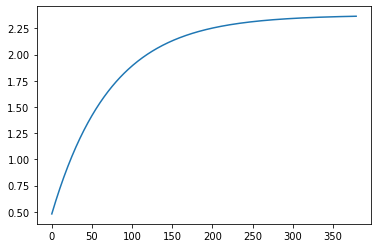

In [234]:
#Forecasts generated for standard GARCH(1,1)
from arch import arch_model
from matplotlib import pyplot
returns = df['Return']*100 # we scale the return by 100

# split data into 90% train data and 10% test data
n_test = 380
train, test = returns[:-n_test], returns[-n_test:]
# define the GARCH(1,1) model
model = arch_model(train, mean='Zero', vol='GARCH', p=1, q=1)
# fit model on the train data
#residual is the difference between actual and predicted volatility
res = model.fit()
print('------------------------------------------------------------------------------')
print(res.summary())
# forecast the test set
vol_for = res.forecast(horizon=n_test)
# plot forecast variance
pyplot.plot(vol_for.variance.values[-1, :])
print('------------------------------------------------------------------------------')
pyplot.show()


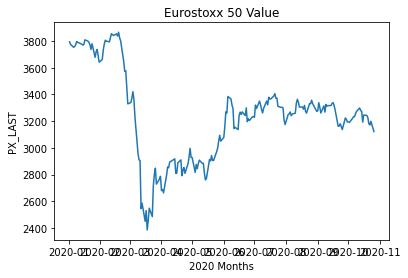

In [183]:
#What if we want to plot the price of the Stoxx50 but just for the year 2020?
#first we create a column year 
df['year'] = pd.DatetimeIndex(df['Date']).year
#then we plot 
df_2020 = df[df['year']>2019]
x = df_2020['Date']
y = df_2020['PX_LAST']
plt.plot(x, y)   
plt.xlabel('2020 Months') 
plt.ylabel('PX_LAST') 
plt.title('Eurostoxx 50 Value') 
plt.show() 

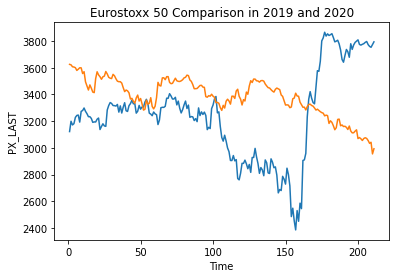

In [215]:
#Let's compare the year 2019 and 2020
df_2020 = df[df['year']>2019]
df_2019 = df[(df['year']>2018) & (df['year']<2020)]
#df_2020 = df[df.Date.dt.year>2019] #is another possibility 
#df_2019 = df[(df.Date.dt.year>2018) & (df.Date.dt.year<2020)] #is another possibility 
x = np.arange(1, len(df_2020)+1)
y_2020 = df_2020['PX_LAST']
y_2019 = df_2019['PX_LAST']
y_2019 = y_2019[45:] # because len(df_2020)=211 and len(df_2019)=256
plt.plot(x, y_2020)  
plt.plot(x, y_2019)
plt.xlabel('Time') 
plt.ylabel('PX_LAST') 
plt.title('Eurostoxx 50 Comparison in 2019 and 2020')
plt.show() 

In [222]:
#Checking Stationarity of the Time Serie Data
#The Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test figures out if a time series is stationary 
from statsmodels.tsa.stattools import kpss
stats, p, lags, critical_values = kpss(df['Return'],'c',nlags='legacy')

/Users/axelmonod/Desktop/Venv/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1885: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
